In [20]:
import numpy as np
import matplotlib.pyplot as plt
from helperFunctions import convert_to_numpy, convert_to_tiff


In [13]:
def shift_image_fft(image, shift_x, shift_y):
    """
    Shift a 2D image using a phase ramp in the Fourier domain.

    Parameters:
    image (2D numpy array): The input image to be shifted.
    shift_x (float): The shift in the x direction (horizontal shift).
    shift_y (float): The shift in the y direction (vertical shift).

    Returns:
    shifted_image (2D numpy array): The shifted image.
    """
    # Fourier transform of the image
    fft_image = np.fft.fft2(image)

    # Get the image dimensions
    rows, cols = image.shape

    # Create frequency coordinate grids
    u = np.fft.fftfreq(cols)  # Frequency coordinates along the x-axis
    v = np.fft.fftfreq(rows)  # Frequency coordinates along the y-axis
    U, V = np.meshgrid(u, v)  # 2D grid of frequency coordinates

    # Calculate the phase ramp
    phase_ramp = np.exp(-2j * np.pi * (shift_x * U + shift_y * V))

    # Apply the phase ramp to the Fourier-transformed image
    shifted_fft_image = fft_image * phase_ramp

    # Inverse Fourier transform to get the shifted image
    shifted_image = np.fft.ifft2(shifted_fft_image).real

    return shifted_image

In [14]:
#Read in Kevin projection for reference
aligned_proj_location = "/Users/levih/Desktop/TomoMono/alignedProjections/aligned_foamTomo20240718-165515.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
kevinProjOriginal = kevinProjections[0]

newKevinProj = shift_image_fft(kevinProjOriginal, 50.23, 80.49385)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/levih/Desktop/TomoMono/alignedProjections/aligned_foamTomo20240718-165515.tif'

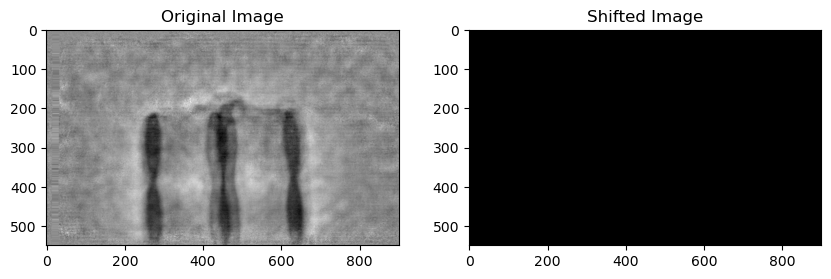

In [15]:
# Plot original and shifted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(kevinProjOriginal, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Shifted Image")
plt.imshow(newKevinProj, cmap='gray')
plt.show()

In [37]:
import numpy as np

def subpixel_shift(image, shift_y, shift_x):
    """
    Shift a 2D image using a phase ramp in the Fourier domain and pad out-of-bounds regions with zeros.

    Parameters:
    image (2D numpy array): The input image to be shifted.
    shift_x (float): The shift in the x direction (horizontal shift).
    shift_y (float): The shift in the y direction (vertical shift).

    Returns:
    shifted_image (2D numpy array): The shifted image with out-of-bounds areas padded with zeros.
    """
    # Fourier transform of the image
    fft_image = np.fft.fft2(image)

    # Get the image dimensions
    rows, cols = image.shape

    # Create frequency coordinate grids
    u = np.fft.fftfreq(cols)  # Frequency coordinates along the x-axis
    v = np.fft.fftfreq(rows)  # Frequency coordinates along the y-axis
    U, V = np.meshgrid(u, v)  # 2D grid of frequency coordinates

    # Calculate the phase ramp for shifting
    phase_ramp = np.exp(-2j * np.pi * (shift_x * U + shift_y * V))

    # Apply the phase ramp to the Fourier-transformed image
    shifted_fft_image = fft_image * phase_ramp

    # Inverse Fourier transform to get the shifted image
    shifted_image = np.fft.ifft2(shifted_fft_image).real

    # Create a mask of valid regions
    mask = np.ones_like(image)

    # Calculate how much to pad with zeros based on shift
    pad_x_left = int(np.ceil(shift_x)) if shift_x > 0 else 0
    pad_x_right = int(np.ceil(-shift_x)) if shift_x < 0 else 0
    pad_y_top = int(np.ceil(shift_y)) if shift_y > 0 else 0
    pad_y_bottom = int(np.ceil(-shift_y)) if shift_y < 0 else 0

    # Apply zero padding based on shifts
    if pad_y_top != 0:
        mask[:pad_y_top, :] = 0  # Top padding
    if pad_y_bottom != 0:
        mask[-pad_y_bottom:, :] = 0  # Bottom padding
    if pad_x_left != 0:
        mask[:, :pad_x_left] = 0  # Left padding
    if pad_x_right != 0:
        mask[:, -pad_x_right:] = 0  # Right padding

    # Apply the mask to the shifted image
    shifted_image *= mask
    
    return shifted_image


81
0
80.49385
50.23
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


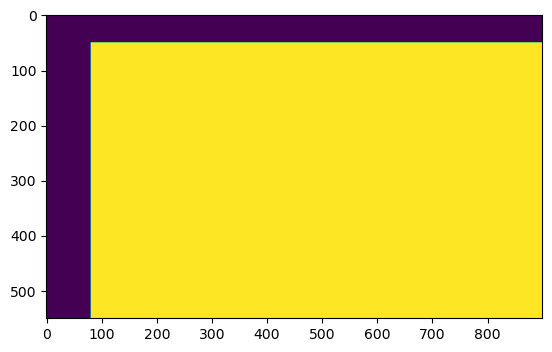

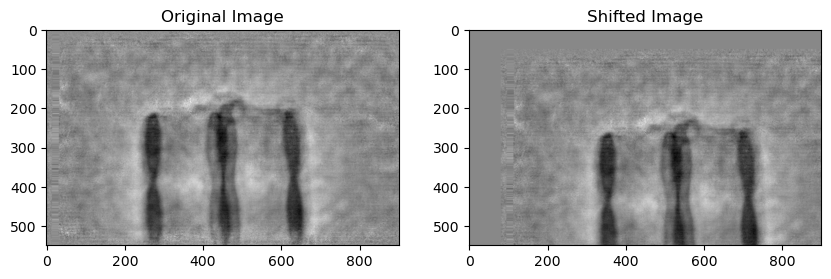

In [38]:
#Read in Kevin projection for reference
aligned_proj_location = "alignedProjections/aligned_iterateVMF_optFlow_sirt_20240905-223101.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
kevinProjOriginal = kevinProjections[0]

newKevinProj = subpixel_shift(kevinProjOriginal, 50.23, 80.49385)

# Plot original and shifted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(kevinProjOriginal, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Shifted Image")
plt.imshow(newKevinProj, cmap='gray')
plt.show()